#### *kernel : GP (Python 3.11.3)*

In [1]:
# import dicom        # fakes di 3adi
import pydicom      # di el mohma

import os # accessing directory structure
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
from mpl_toolkits.mplot3d import Axes3D
# from sklearn.preprocessing import StandardScaler


In [2]:
from pydicom.sequence import Sequence
from pydicom.dataset import Dataset, DataElement

---

In [8]:
path01 = "../../APP/archive/images/images/LIDC-IDRI-0001-000001.dcm"
path02 = "../../APP/archive/images/images/LIDC-IDRI-0001-000002.dcm"
file01 = pydicom.read_file(path01)
file02 = pydicom.read_file(path02)
print(f"file01 shape : {file01.pixel_array.shape} \nfile02 shape : {file02.pixel_array.shape}")

file01 shape : (2022, 2022) 
file02 shape : (2022, 2022)


`"LIDC-IDRI-0001"` &rarr; patient ID  
`"-000001"` &rarr; sequence/frame number  

In [6]:
file.keys

<bound method Dataset.keys of Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.307896144859643716158189196068
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.

---

In [8]:
path = "../../APP/archive/images/images/LIDC-IDRI-0001-000001.dcm"
file01 = pydicom.read_file(path)
file02 = pydicom.dcmread(path)
print(f"file01 using read_file : {type(file01)} \nfile02 using dcmread : {type(file02)}")

file01 using read_file : <class 'pydicom.dataset.FileDataset'> 
file02 using dcmread : <class 'pydicom.dataset.FileDataset'>


In [9]:
file01.PatientID, file01.PatientOrientation

('LIDC-IDRI-0001', ['L', 'F'])

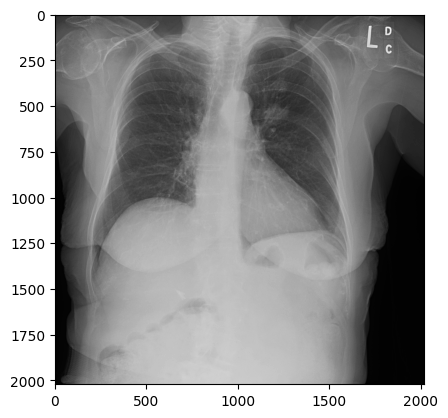

In [10]:
slice = file01.pixel_array
slice[slice == -2000] = 0
plt.imshow(slice, cmap="gray")

In [11]:
def readCT(folder_name):
        # Read the slices from the dicom file
        slices = [pydicom.read_file(folder_name + filename) for filename in os.listdir(folder_name)]
        
        # Sort the dicom slices in their respective order
        slices.sort(key=lambda x: int(x.InstanceNumber))
        
        # ERROR HERE DUE TO DIFFERENT ARRAY SHAPES
        # Get the pixel values for all the slices
        slices = np.stack([s.pixel_array for s in slices])
        slices[slices == -2000] = 0
        return slices

In [16]:
folder = "./archive/images/images/"
slices = []
print(f"number of imgs = {len(os.listdir(folder))}")

number of imgs = 463


In [17]:
# read slices from dicom file
for i, file in enumerate(os.listdir(folder)):
    filePath = os.path.join(folder, file)
    slice = pydicom.read_file(filePath)
    slices.append(slice)

In [19]:
# sort dicom slices in respective order
slices.sort(key = lambda x : int(x.InstanceNumber))

In [24]:
slices[0].pixel_array.shape

(2269, 2265)

In [25]:
# print pixel_array shapes
for s in slices:
    print(s.pixel_array.shape)

(2269, 2265)
(2845, 3000)
(2795, 2790)
(2442, 2540)
(2758, 2465)
(2756, 2516)
(2575, 2921)
(2897, 2749)
(2704, 2674)
(2299, 1897)
(1861, 2151)
(2046, 1861)
(2706, 2444)
(2758, 2465)
(2567, 2650)
(2985, 2985)
(2022, 2022)
(2022, 2022)
(2022, 1736)
(2022, 1736)
(2022, 2022)
(2022, 2022)
(2022, 2022)
(2022, 2022)
(2022, 1736)
(2022, 1736)
(2022, 1736)
(2022, 1736)
(2022, 2022)
(2022, 2022)
(2022, 2022)
(2022, 1736)
(2022, 1736)
(2022, 2022)
(2022, 2022)
(2022, 1736)
(2022, 1736)
(2022, 1736)
(2500, 2048)
(2022, 1736)
(2022, 2022)
(2022, 1736)
(2022, 1736)
(2022, 2022)
(2022, 1736)
(2022, 2022)
(2022, 2022)
(2022, 2022)
(2022, 1736)
(2022, 2022)
(2022, 2022)
(2991, 2834)
(2022, 2022)
(2022, 1736)
(2500, 2048)
(2022, 1736)
(2022, 1736)
(2022, 2022)
(2022, 1736)
(2022, 2022)
(2022, 2022)
(2048, 2500)
(2674, 2488)
(2022, 2022)
(2927, 2992)
(2022, 1736)
(2022, 1736)
(2048, 2500)
(2927, 2992)
(2927, 2762)
(2022, 2022)
(2022, 2022)
(2022, 1751)
(1760, 2140)
(2855, 2890)
(2022, 1736)
(2022, 2022)

---